**Nombre:** Camila Ponce
# Parte 1
## Enunciado asignado
**Enunciado 1:** dado el archivo de registros de jugadas (eventos) de MemPy, mostrar un gráfico con el porcentaje de partidas que se juegan los fines de semana (sábados y domingos).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/registro.csv', encoding='utf-8')

El archivo csv utilizado corresponde a datos creados jugando Mempy.
Se agrupan los datos por día y por partida para no obtener las repeticiones que aparecen en el archivo csv.

In [ ]:
dias = data_set.groupby(["dia","Partida"])["dia"].count()

Se calcula la cantidad de veces que se jugó en el fin de semana y el resto de los dias de semana

In [ ]:
cantidad_sabado = len(dias["sabado"])
cantidad_domingo = len(dias["domingo"])
cantidad_fin_de_semana = cantidad_sabado + cantidad_domingo

In [ ]:
cantidad_lunes = len(dias["lunes"]) 

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Con las cantidades obtenidas grafico el porcentaje de partidas jugadas en los fines de semana

In [ ]:
etiquetas = ["Fin de semana", "Resto de la semana"]
data_dibujo = [cantidad_fin_de_semana, cantidad_lunes]
plt.pie(data_dibujo, labels=etiquetas, autopct='%1.1f%%',
shadow=True, startangle=90, labeldistance= 1.1)
plt.axis('equal')
plt.legend(etiquetas)
plt.title("Porcentaje de partidas que se juegan los fines de semana")
plt.show()

# Parte 2

## Criterio elegido

Dataset: Contienen los nombres y tipo de pokemon

Criterio: Todos los pokemon de tipo "normal"


In [3]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
data_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/pokemon.csv', encoding='utf-8')

El filtro va a ser por todos los pokemon que sean de tipo normal, como a veces pueden tener 2 tipos diferentes, tengo que verificar si alguno de los dos es "normal"

In [ ]:
criterio = data_set[data_set.apply(lambda x: x["Type1"] == "Normal" or x["Type2"] == "Normal", axis="columns")]

Guardo los nombres de todos los pokemon que cumplen con el criterio

In [17]:
palabras = criterio.Name.unique() 

array(['pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate', 'spearow',
       'fearow', 'jigglypuff', 'wigglytuff', 'meowth', 'persian',
       'farfetchd', 'doduo', 'dodrio', 'lickitung', 'chansey',
       'kangaskhan', 'tauros', 'ditto', 'eevee', 'porygon', 'snorlax',
       'sentret', 'furret', 'hoothoot', 'noctowl', 'igglybuff', 'aipom',
       'girafarig', 'dunsparce', 'teddiursa', 'ursaring', 'porygon2',
       'stantler', 'smeargle', 'miltank', 'blissey', 'zigzagoon',
       'linoone', 'taillow', 'swellow', 'slakoth', 'vigoroth', 'slaking',
       'whismur', 'loudred', 'exploud', 'azurill', 'skitty', 'delcatty',
       'spinda', 'swablu', 'zangoose', 'castform', 'kecleon', 'starly',
       'staravia', 'staraptor', 'bidoof', 'bibarel', 'ambipom', 'buneary',
       'lopunny', 'glameow', 'purugly', 'happiny', 'chatot', 'munchlax',
       'lickilicky', 'porygon-z', 'regigigas', 'arceus', 'patrat',
       'watchog', 'lillipup', 'herdier', 'stoutland', 'pidove',
       'tranquill'

Creo la nube de palabras con las palabras antes obtenidas

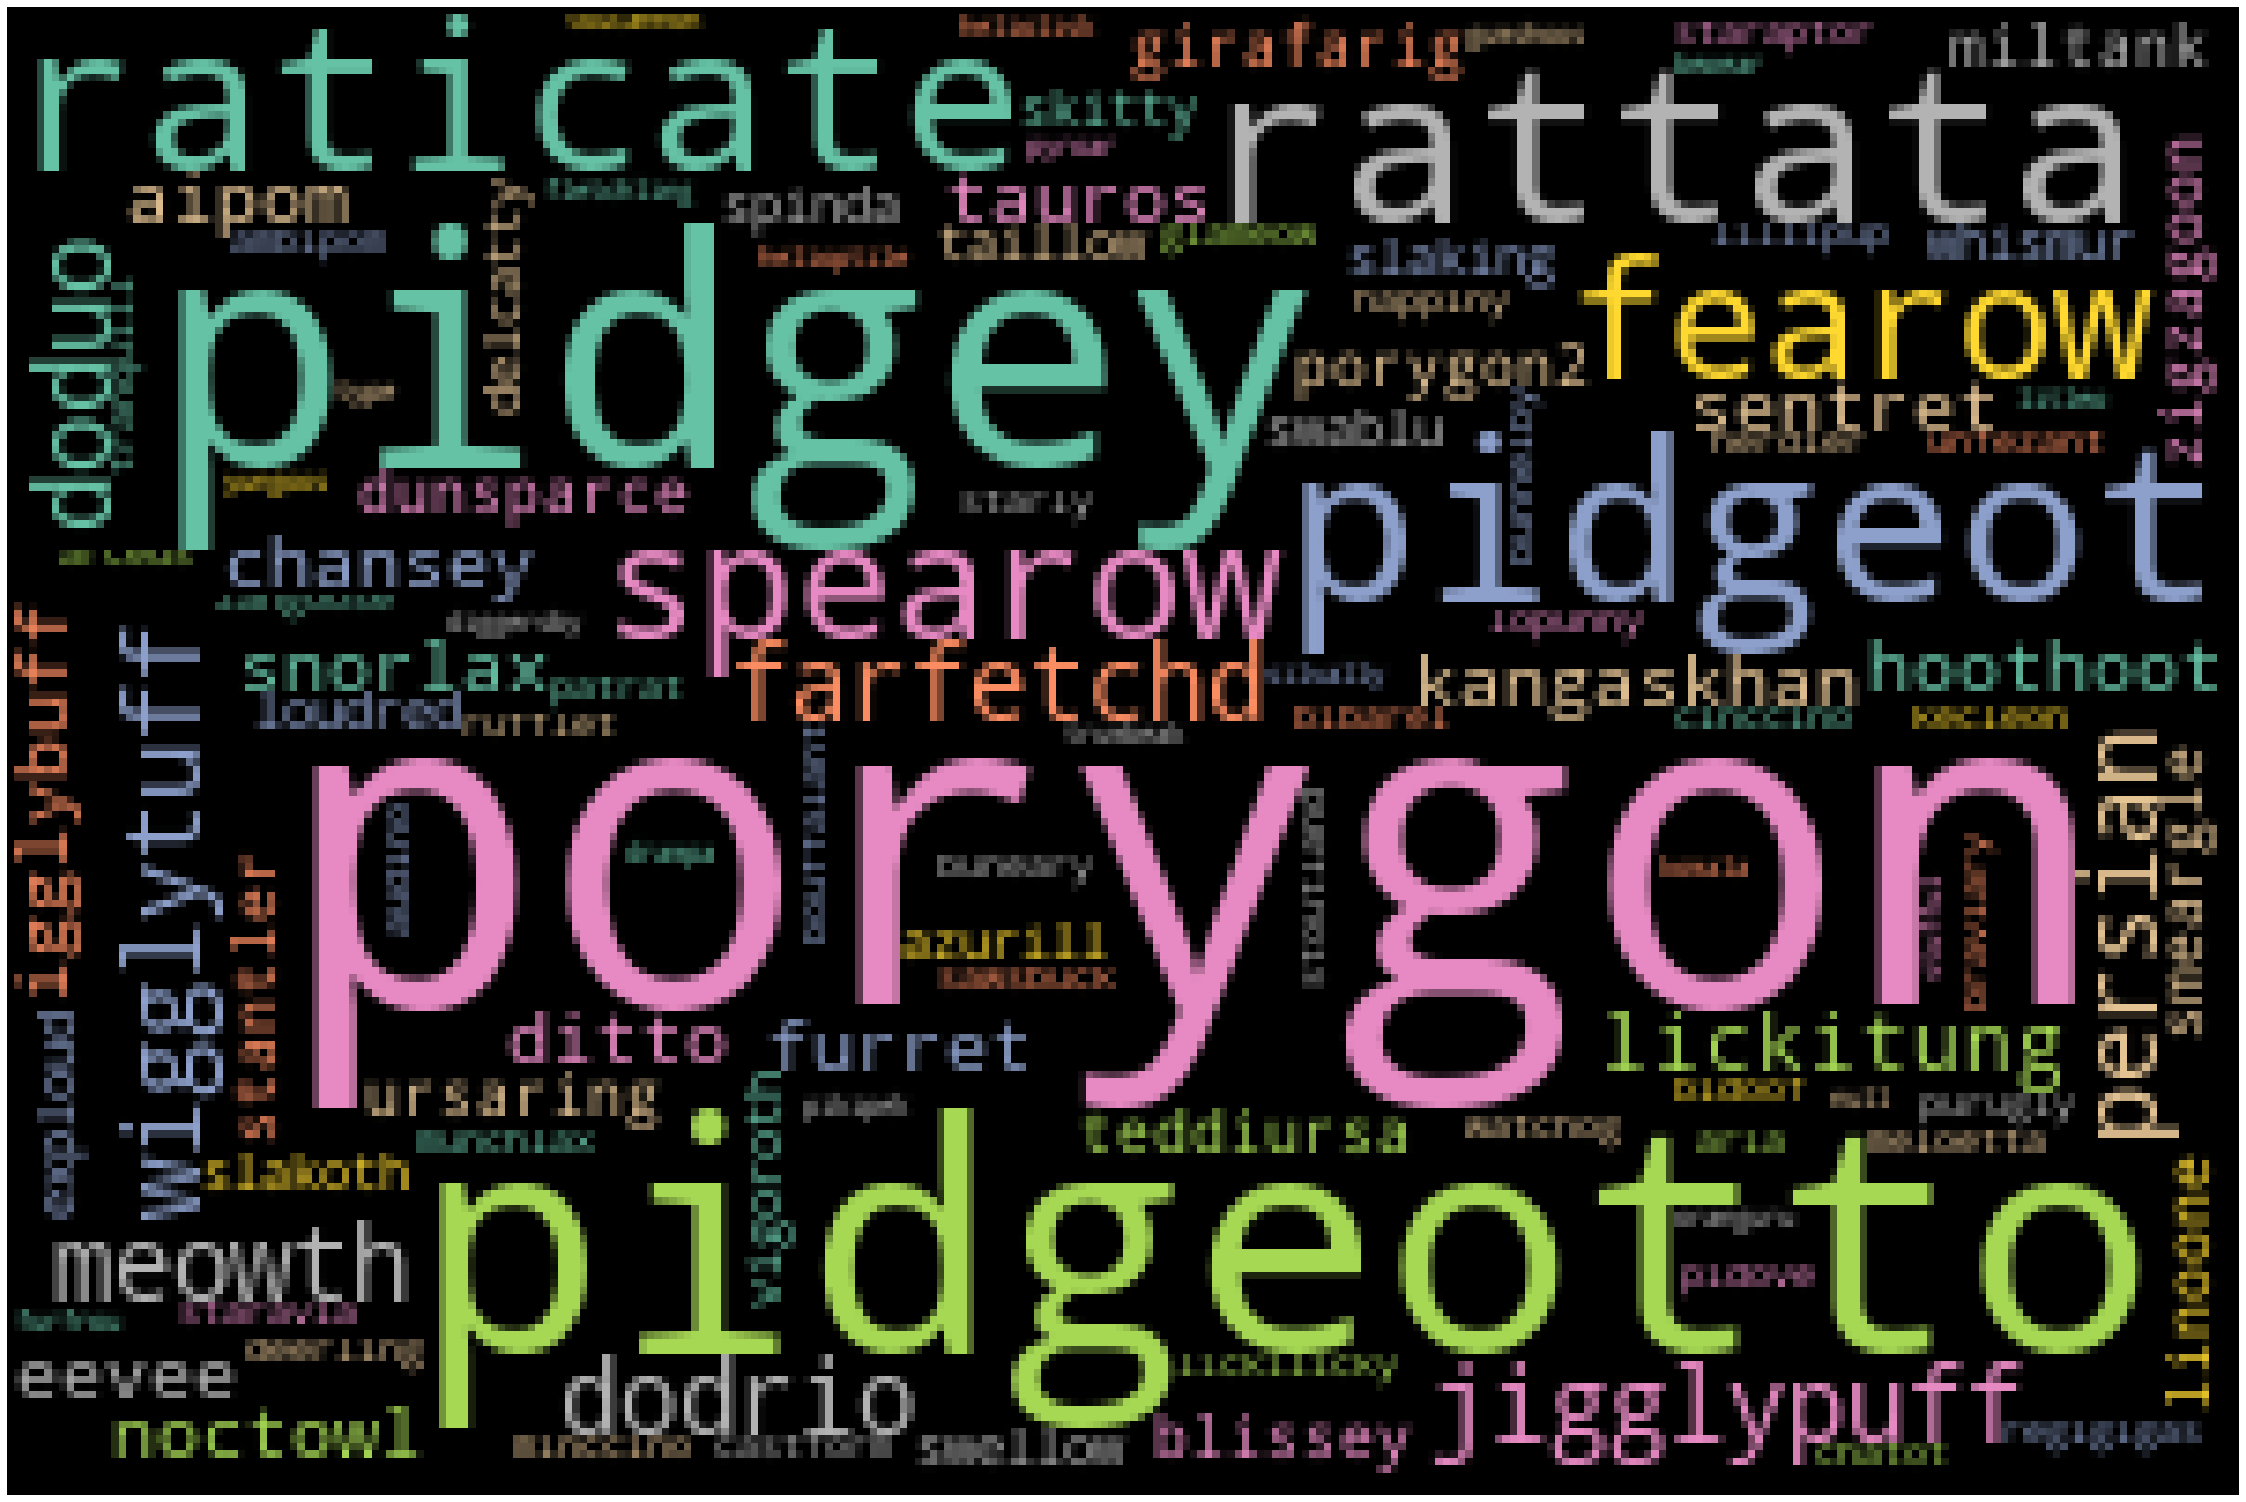

In [24]:
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis("off");
text = str(palabras)
# limpieza de texto
text = text.replace('\'', '')
wordcloud = WordCloud(width = 300, height = 200, random_state=1,background_color='black', colormap='Set2', stopwords = STOPWORDS).generate(text)
#ploteo de la nube de palabras
plot_cloud(wordcloud)